In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from figure_utils import journal_figure, nanmad
import stats as my_stats

In [60]:
ev_reversed_m = np.load(f'./results_for_figures/monkey2model/m1/ev_resnet.npy')
ev_reversed_n = np.load(f'./results_for_figures/monkey2model/m2/ev_resnet.npy')

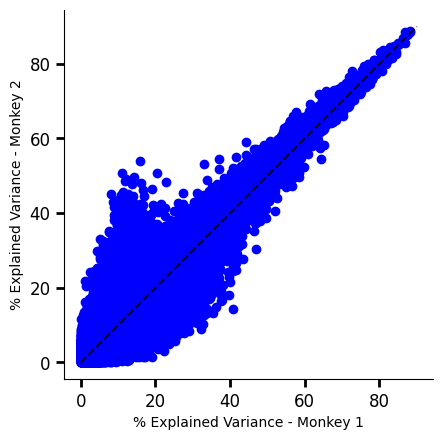

In [5]:
plt.scatter(ev_reversed_n, ev_reversed_m, color="blue")
plt.xlabel("% Explained Variance - Monkey 1")
plt.ylabel("% Explained Variance - Monkey 2")
plt.plot([0, 90], [0, 90], linestyle='--', color="black")
journal_figure()

In [65]:
my_stats.nancorr(ev_reversed_m, ev_reversed_n)

r(100351) = 0.89, p = < 0.001


(np.float64(0.8920778943132779), np.float64(0.0))

In [48]:
sizes=[20, 50, 81, 112, 143, 174, 205, 236, 267, 288]
model = "resnet"

In [49]:
evs_sampling_m = {}
evs_sampling_mad = {}
for monkey in ["m1", "m2"]:
    out_dir = f'./results_for_figures/monkey2model/{monkey}/sampling/'
    evs_sampling_m[monkey] = []
    evs_sampling_mad[monkey] = []
    for s in sizes:
        ev_path = os.path.join(out_dir, f'ev_{model}_{s}.npy')
        ev = np.load(ev_path)
        evs_sampling_m[monkey].append(np.nanmean(ev))
        evs_sampling_mad[monkey].append(nanmad(ev.reshape(-1)))

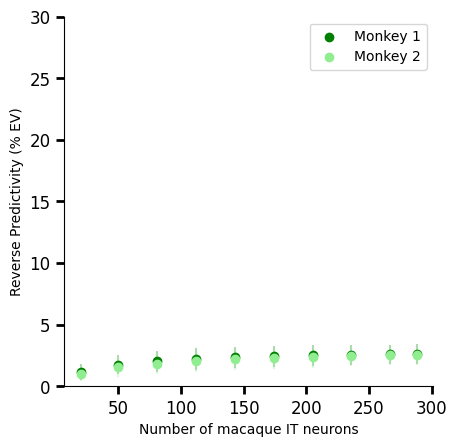

In [51]:
plt.scatter(sizes, evs_sampling_m["m1"], color="green", label="Monkey 1", zorder=15)
plt.errorbar(sizes, evs_sampling_m["m1"], yerr=evs_sampling_mad["m1"], color="green", alpha=0.3, linestyle="None", zorder=5)
plt.scatter(sizes, evs_sampling_m["m2"], color="lightgreen", label="Monkey 2", zorder=15)
plt.errorbar(sizes, evs_sampling_m["m2"], yerr=evs_sampling_mad["m2"], color="lightgreen", alpha=0.3, linestyle="None", zorder=5)
plt.ylim(0,30)
plt.xlabel("Number of macaque IT neurons")
plt.ylabel('Reverse Predictivity (% EV)')
plt.legend()
journal_figure()

In [74]:
print(f"Monkey 1: {evs_sampling_m['m1'][-1]:.2f} +/- {evs_sampling_mad['m1'][-1]:.2f}")

Monkey 1: 2.59 +/- 0.80


In [75]:
print(f"Monkey 2: {evs_sampling_m['m2'][-1]:.2f} +/- {evs_sampling_mad['m2'][-1]:.2f}")

Monkey 2: 2.53 +/- 0.77


In [52]:
sizes = np.linspace(20, 99850, 20).astype(int)

In [53]:
sizes_instances = np.linspace(20, 100352, 20).astype(int)

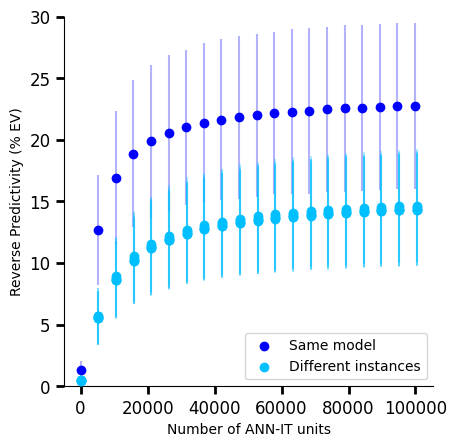

In [ ]:
out_dir = f'./results_for_figures/within_model/{model}/'
evs_sampling_self = []
for s in sizes:
    ev_path = os.path.join(out_dir, f'ev_{model}_{s}.npy')
    ev = np.load(ev_path)
    evs_sampling_self.append(ev)

evs_sampling_self_m = np.nanmean(np.array(evs_sampling_self), axis=(1, 2))
evs_sampling_self_mad = []
for s in range(len(sizes)):
    evs_sampling_self_mad.append(nanmad(evs_sampling_self[s].flatten()))

plt.scatter(sizes, evs_sampling_self_m, color="blue", zorder=15, label="Same model")
plt.errorbar(sizes, evs_sampling_self_m, yerr=evs_sampling_self_mad, color="blue", alpha=0.3, linestyle="None", zorder=5)

evs_sampling_instances_m = {}
evs_sampling_instances_mad = {}
for instance in ["resnet_2", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    out_dir = f'./results_for_figures/within_model/{model}/'
    evs_sampling_instances_m[instance] = []
    evs_sampling_instances_mad[instance] = []
    for s in sizes_instances:
        ev_path = os.path.join(out_dir, f'ev_{instance}_{s}.npy')
        ev = np.load(ev_path)
        evs_sampling_instances_m[instance].append(np.nanmean(ev))
        evs_sampling_instances_mad[instance].append(nanmad(ev.reshape(-1)))

for instance in ["resnet_2", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    plt.scatter(sizes_instances, evs_sampling_instances_m[instance], color="deepskyblue", zorder=15, label="Different instances" if instance == "resnet_0" else None)
    plt.errorbar(sizes_instances, evs_sampling_instances_m[instance], yerr=evs_sampling_instances_mad[instance], color="deepskyblue", alpha=0.3, linestyle="None", zorder=15)


plt.ylim(0,30)
plt.xlabel("Number of ANN-IT units")
plt.ylabel('Reverse Predictivity (% EV)')
plt.legend(loc="lower right")
journal_figure()

In [80]:
evs_sampling_instances_all = []
for instance in ["resnet_0", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    evs_sampling_instances_all.append(evs_sampling_instances_m[instance])

evs_sampling_instances_all = np.array(evs_sampling_instances_all).mean(axis=0)

In [85]:
my_stats.print_unpaired_test(evs_sampling_instances_all, evs_sampling_self_m )

z = -4.544, p < 0.001


np.float64(5.508804169740111e-06)